# <span style='color:#FE774C'>World Ocean Database </span> Example Notebook

In [1]:
import odp
import warnings
warnings.filterwarnings("ignore")

In [2]:
db=odp.Database()
db_plt= odp.PlotTools()

In [4]:
db.datasets

,schema,table
name,,
World Ocean Database Measurements,raw_wod,observations_temp
World Ocean Database Casts,raw_wod,casts_temp
OBIS Biodiversity,raw_obis,occurrences
World Marine Heritage Sites,raw_marineregions,worldmarineheritagesites
World Seas IHO,raw_marineregions,world_seas_iho_v3
EEZ Land Union,raw_marineregions,eez_land_union_v3_202003
Intersect EEZ IHO,raw_marineregions,intersect_eez_iho_v4_2020
World EEZ,raw_marineregions,world_eez_v11_20191118


## Pulling data - <span style='color:#FE774C'> **World Ocean Database** </span> -- Cast Information


#### Insert the name of the table you are interested in into the query function
In this case we are interseted in the World Ocean Database Casts

In [3]:
df_casts=db.query('World Ocean Database Casts',
            date_from='2000-06-01',
            date_to='2000-08-30')

In [6]:
df_casts.head()

,cast_id,timestamp,geometry,year,dataset_id,changeset_id,subcategory,instrument_id,country,wod_cast_index,wod_dataset_id,wod_cruise_identifier,platform,institute,project,observation_count
0,17049457,2000-06-01,POINT (-49.99330 44.81000),2000,None,None,None,None,CANADA,334,/nodc/data/oc5.clim.4/wod_update_nc/2000/wod_u...,CA014736,WILFRED TEMPLEMAN (CCGS;F/R/V;call sign CGDV; ...,,None,160
1,17049456,2000-06-01,POINT (-49.47830 44.65830),2000,None,None,None,None,CANADA,333,/nodc/data/oc5.clim.4/wod_update_nc/2000/wod_u...,CA014736,WILFRED TEMPLEMAN (CCGS;F/R/V;call sign CGDV; ...,,None,185
2,10108445,2000-06-01,POINT (-10.30000 -44.64000),2000,None,None,None,None,UNITED STATES,6007,/nodc/data/oc5.clim.1/wod_update_nc/Jan2020/20...,US017112,None,SCRIPPS INSTITUTION OF OCEANOGRAPHY; LA JOLLA; CA,,100
3,9225145,2000-06-01,POINT (-25.82000 35.04000),2000,None,None,None,None,UNITED STATES,6006,/nodc/data/oc5.clim.1/wod_update_nc/Jan2020/20...,US016235,None,UNIVERSITY OF WASHINGTON; SEATTLE,,93
4,10108444,2000-06-01,POINT (-31.71000 50.72000),2000,None,None,None,None,UNITED STATES,6005,/nodc/data/oc5.clim.1/wod_update_nc/Jan2020/20...,US017194,None,WOODS HOLE OCEANOGRAPHIC INSTITUTE (WHOI),,54


### Add <span style='color:#9D59F4'> **filters** </span> to the data pull

In this case we are interseted casts from CANADA
First let's make the filter using the filter_data functions<br>
Input the column, the operator, and the value you want to filter on

In [4]:
filter1 = db.filter_data('country', '=', 'CANADA')


Then pass in the filter you created into the query

In [5]:
df_casts_canada=db.query('World Ocean Database Casts',
                date_from='2000-06-01',
                date_to='2000-08-31',
                filters=[filter1])

In [6]:
df_casts_canada.head(3)

,cast_id,timestamp,geometry,year,dataset_id,changeset_id,subcategory,instrument_id,country,wod_cast_index,wod_dataset_id,wod_cruise_identifier,platform,institute,project,observation_count
0,17049457,2000-06-01,POINT (-49.99330 44.81000),2000,None,None,None,None,CANADA,334,/nodc/data/oc5.clim.4/wod_update_nc/2000/wod_u...,CA014736,WILFRED TEMPLEMAN (CCGS;F/R/V;call sign CGDV; ...,,None,160
1,17049456,2000-06-01,POINT (-49.47830 44.65830),2000,None,None,None,None,CANADA,333,/nodc/data/oc5.clim.4/wod_update_nc/2000/wod_u...,CA014736,WILFRED TEMPLEMAN (CCGS;F/R/V;call sign CGDV; ...,,None,185
2,9240535,2000-06-01,POINT (-130.86400 49.61700),2000,None,None,None,None,CANADA,6002,/nodc/data/oc5.clim.1/wod_update_nc/Jan2020/20...,CA013493,None,DEPARTMENT OF FISHERIES AND OCEANS; INSTITUTE ...,,54


### <span style='color:#9D59F4'> **Plot the data** </span> using built-in functions
#### Here we create a static plot of casts and color by 'observation_count'

#### We can plot just the points, or color-code by a column

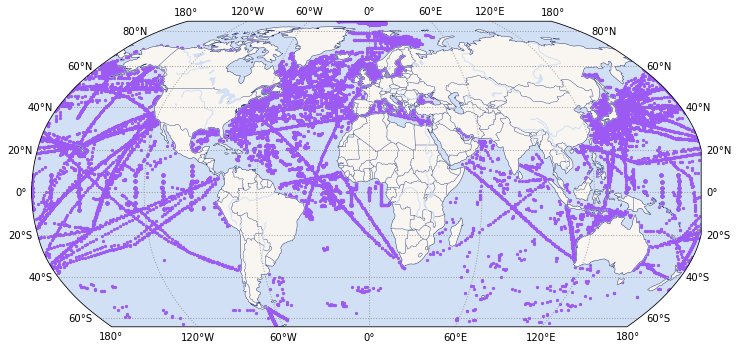

In [10]:
db_plt.plot_points(df_casts)

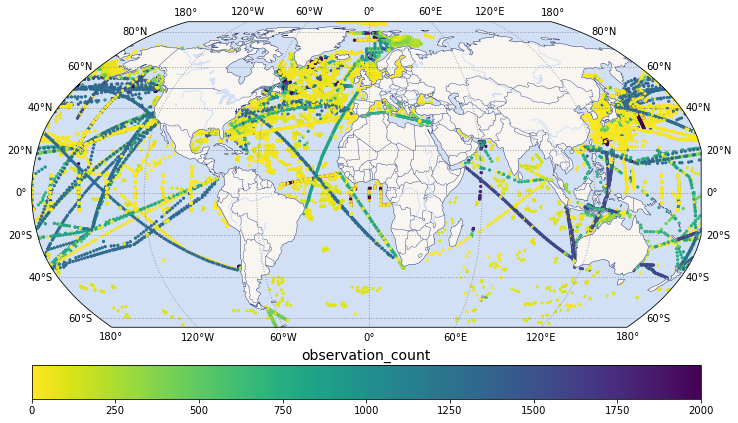

In [11]:
db_plt.plot_points(df_casts, col='observation_count', cmap='viridis_r', vrange=[0,2000])

#### We can also plot a subset as an interactive plot (Will show only when cell is run)

In [9]:
db.plot(df_casts.iloc[0:100])

{"initialViewState": {"latitude": 0, "longitude": 0, "zoom": 1}, "layers": [{"@@type": "PointCloudLayer", "autoHighlight": true, "data": [{"cast_id": 17049457, "changeset_id": null, "country": "CANADA", "dataset_id": null, "geometry": {"coordinates": [-49.99330139160156, 44.810001373291016], "type": "Point"}, "institute": "", "instrument_id": null, "observation_count": 160, "platform": "WILFRED TEMPLEMAN (CCGS;F/R/V;call sign CGDV; built 1981;IMO7907099)", "project": null, "subcategory": null, "time": "2000-06-01 00:00:00", "timestamp": {}, "wod_cast_index": 334, "wod_cruise_identifier": "CA014736", "wod_dataset_id": "/nodc/data/oc5.clim.4/wod_update_nc/2000/wod_uor_2000.nc", "year": 2000}, {"cast_id": 17049456, "changeset_id": null, "country": "CANADA", "dataset_id": null, "geometry": {"coordinates": [-49.47829818725586, 44.65829849243164], "type": "Point"}, "institute": "", "instrument_id": null, "observation_count": 185, "platform": "WILFRED TEMPLEMAN (CCGS;F/R/V;call sign CGDV; built 1981;IMO7907099)", "project": null, "subcategory": null, "time": "2000-06-01 00:00:00", "timestamp": {}, "wod_cast_index": 333, "wod_cruise_identifier": "CA014736", "wod_dataset_id": "/nodc/data/oc5.clim.4/wod_update_nc/2000/wod_uor_2000.nc", "year": 2000}, {"cast_id": 10108445, "changeset_id": null, "country": "UNITED STATES", "dataset_id": null, "geometry": {"coordinates": [-10.300000190734863, -44.63999938964844], "type": "Point"}, "institute": "SCRIPPS INSTITUTION OF OCEANOGRAPHY; LA JOLLA; CA", "instrument_id": null, "observation_count": 100, "platform": null, "project": "", "subcategory": null, "time": "2000-06-01 00:00:00", "timestamp": {}, "wod_cast_index": 6007, "wod_cruise_identifier": "US017112", "wod_dataset_id": "/nodc/data/oc5.clim.1/wod_update_nc/Jan2020/2000/wod_pfl_2000.nc", "year": 2000}, {"cast_id": 9225145, "changeset_id": null, "country": "UNITED STATES", "dataset_id": null, "geometry": {"coordinates": [-25.81999969482422, 35.040000915527344], "type": "Point"}, "institute": "UNIVERSITY OF WASHINGTON; SEATTLE", "instrument_id": null, "observation_count": 93, "platform": null, "project": "", "subcategory": null, "time": "2000-06-01 00:00:00", "timestamp": {}, "wod_cast_index": 6006, "wod_cruise_identifier": "US016235", "wod_dataset_id": "/nodc/data/oc5.clim.1/wod_update_nc/Jan2020/2000/wod_pfl_2000.nc", "year": 2000}, {"cast_id": 10108444, "changeset_id": null, "country": "UNITED STATES", "dataset_id": null, "geometry": {"coordinates": [-31.709999084472656, 50.720001220703125], "type": "Point"}, "institute": "WOODS HOLE OCEANOGRAPHIC INSTITUTE (WHOI)", "instrument_id": null, "observation_count": 54, "platform": null, "project": "", "subcategory": null, "time": "2000-06-01 00:00:00", "timestamp": {}, "wod_cast_index": 6005, "wod_cruise_identifier": "US017194", "wod_dataset_id": "/nodc/data/oc5.clim.1/wod_update_nc/Jan2020/2000/wod_pfl_2000.nc", "year": 2000}, {"cast_id": 9225144, "changeset_id": null, "country": "UNITED STATES", "dataset_id": null, "geometry": {"coordinates": [-33.16999816894531, 31.739999771118164], "type": "Point"}, "institute": "", "instrument_id": null, "observation_count": 49, "platform": null, "project": "", "subcategory": null, "time": "2000-06-01 00:00:00", "timestamp": {}, "wod_cast_index": 6004, "wod_cruise_identifier": "US016216", "wod_dataset_id": "/nodc/data/oc5.clim.1/wod_update_nc/Jan2020/2000/wod_pfl_2000.nc", "year": 2000}, {"cast_id": 9225143, "changeset_id": null, "country": "UNITED STATES", "dataset_id": null, "geometry": {"coordinates": [132.0, 38.0], "type": "Point"}, "institute": "UNIVERSITY OF WASHINGTON; SEATTLE", "instrument_id": null, "observation_count": 48, "platform": null, "project": "", "subcategory": null, "time": "2000-06-01 00:00:00", "timestamp": {}, "wod_cast_index": 6003, "wod_cruise_identifier": "US016424", "wod_dataset_id": "/nodc/data/oc5.clim.1/wod_update_nc/Jan2020/2000/wod_pfl_2000.nc", "year": 2000}, {"cast_id": 9240535, "changeset_id": null, "country": "CANADA", "

## Pulling data - <span style='color:#FE774C'> **World Ocean Database** </span> -- Variable Measurements

#### Insert the name of the table you are interested in
#### Here let's look at the WOD measurements. We will try out the 'poly' input where we input a polygon of our area of interest. 

Let's define our own polygon

In [12]:
poly= 'POLYGON ((3.0 51.0, 20 51, 20 80, 3 80, 3 51))'

In [ ]:
df_meas=db.query('World Ocean Database Measurements',
            date_from='2000-06-01',
            date_to='2000-06-30',
            poly=poly)

In [ ]:
df_meas.head()

,cast_id,timestamp,geometry,year,z,z_flag,oxygen,oxygen_flag,temperature,temperature_flag,...,nitrate_flag,ph,ph_flag,phosphate,phosphate_flag,silicate,silicate_flag,alkalinity,alkalinity_flag,measurement_id
0,15556547,2000-06-11,POINT Z (19.39800 73.25000 1.48658),2000,1.486576,0,402.586792,0.0,2.500000,0,...,0.0,NaN,NaN,0.526829,0.0,27.317074,0.0,NaN,NaN,66814860603686912
1,15556547,2000-06-11,POINT Z (19.39800 73.25000 1.48660),2000,1.486602,0,405.636719,0.0,2.100000,0,...,0.0,NaN,NaN,1.151219,0.0,30.341465,0.0,NaN,NaN,66814860603686913
2,15556547,2000-06-11,POINT Z (19.39800 73.25000 1.48661),2000,1.486611,0,381.237488,0.0,2.300000,0,...,0.0,NaN,NaN,1.434146,0.0,32.878052,0.0,NaN,NaN,66814860603686914
3,15556547,2000-06-11,POINT Z (19.39800 73.25000 1.48659),2000,1.486588,0,426.985992,0.0,2.400000,0,...,0.0,NaN,NaN,0.702439,0.0,20.878048,0.0,NaN,NaN,66814860603686915
4,15556547,2000-06-11,POINT Z (19.39800 73.25000 0.00000),2000,0.000000,0,335.488983,0.0,24.799999,0,...,0.0,NaN,NaN,0.565854,0.0,19.902439,0.0,NaN,NaN,66814860603686916


### <span style='color:#9D59F4'> **Plot the data** </span> using built-in functions
Here we create a static plot of measurment points and color by 'temperature'

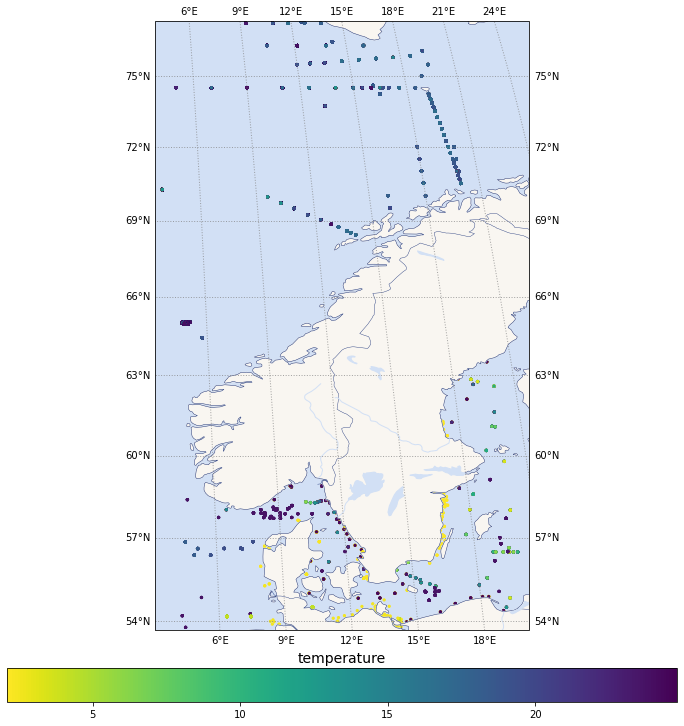

In [ ]:
plot_points(df_meas, col='temperature', cmap='viridis_r')

#### Again, we can also create an interactive plot (will show only when cell is run)

In [ ]:
db.plot(df_meas, col='temperature' )

#### AND we can also create an interactive 3D plot that shows depth (will show only when cell is run)

In [ ]:
plt.plot3d(df_meas,col='temperature')